# Ce Notebook est pour essayer d'interpréter les CNN dans notre modèle

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keract import get_activations
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf
from keras import backend as K

config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.Session(config=config)
set_session(sess)  # set this TensorFlow session as the default session for Keras

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

## Activation visualisation

In [3]:
#On importe une donnée de chaque genre pour voir comment les Kernels réagissent à chaque genre de donnée
X_simulator = np.load("../Datasets/Simulation/X_simulator.npy")
X_1 = np.load('../Datasets/New Dataset 14_08_2019/X_saved_New_0.npy')
X_couloir_1 = np.load('../Datasets/Old dataset/Really old/X_couloir_lumineux.npy')


Y_angle_simulator = np.load('../Datasets/Simulation/Y_simulator.npy')
Y_angle_1 = np.load('../Datasets/New Dataset 14_08_2019/Y_saved_New_0.npy')
Y_angle_couloir_1 = np.load('../Datasets/Old dataset/Really old/Y_couloir_lumineux.npy')


Y_speed_1 = np.load('../Datasets/New Dataset 14_08_2019/Z_saved_New_0.npy')


In [ ]:
#Importation du Modèle
model = load_model('../Models/classification_angle_final.hdf5')
model.summary()

W0830 14:56:22.176801 139641141958464 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0830 14:56:22.187385 139641141958464 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0830 14:56:22.210427 139641141958464 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0830 14:56:22.211297 139641141958464 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Pleas

L'angle correspondant est droite


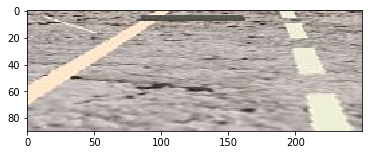

In [5]:
#Visualisation de l'image de départ
data1 = np.reshape(X_simulator[0] , (1 , X_simulator[0].shape[0] , X_simulator[0].shape[1] , X_simulator[0].shape[2]))
plt.imshow(X_simulator[0])
print("L'angle correspondant est droite")

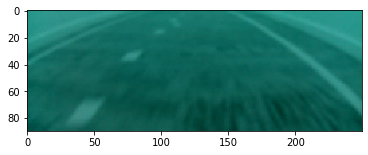

In [6]:
data2 = np.reshape(X_1[0] , (1 , X_1[0].shape[0] , X_1[0].shape[1] , X_1[0].shape[2]))
plt.imshow(X_1[100])

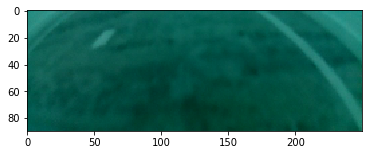

In [7]:
data3 = np.reshape(X_couloir_1[0] , (1 , X_couloir_1[0].shape[0] , X_couloir_1[0].shape[1] , X_couloir_1[0].shape[2]))
plt.imshow(X_couloir_1[100])

In [12]:
#Récupération des activations simulateur
activation1 = get_activations(model ,data1, 'activation_16')
display(activation1.keys())

dict_keys(['activation_16/Relu:0'])

In [13]:
#Récupération des activations couloir speed
activation2 = get_activations(model ,data2, 'activation_16')
display(activation2.keys())

dict_keys(['activation_16/Relu:0'])

In [14]:
#Récupération des activations couloir 
activation3 = get_activations(model ,data3, 'activation_16')
display(activation3.keys())

dict_keys(['activation_16/Relu:0'])

In [15]:
activation1['activation_16/Relu:0'][0 , : , : , 1].shape

(43, 123)

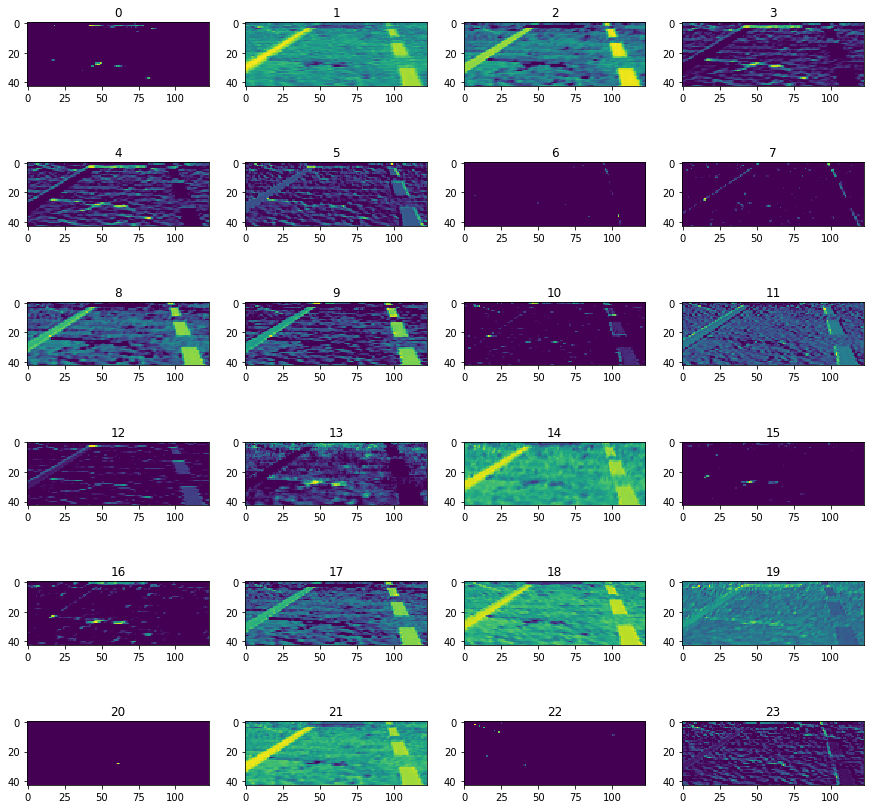

In [16]:
#On trace les activation des différent Kernel simulation
fig1 , ax1 = plt.subplots(ncols = 4 , nrows = 6 , figsize = (15 , 15))
for i in range (24):
    ax1[i//4][i%4].imshow(activation1['activation_16/Relu:0'][0 , : , : , i])
    ax1[i//4][i%4].title.set_text(i)

plt.show()

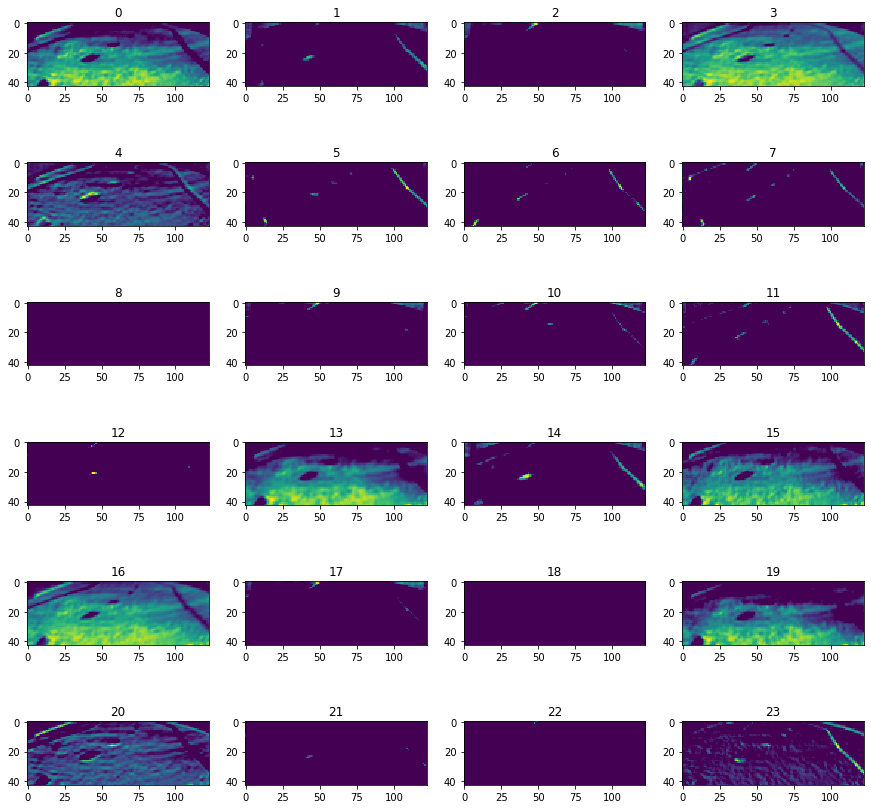

In [17]:
#On trace les activation des différent Kernel couloir speed
fig1 , ax1 = plt.subplots(ncols = 4 , nrows = 6 , figsize = (15 , 15))
for i in range (24):
    ax1[i//4][i%4].imshow(activation2['activation_16/Relu:0'][0 , : , : , i])
    ax1[i//4][i%4].title.set_text(i)

plt.show()

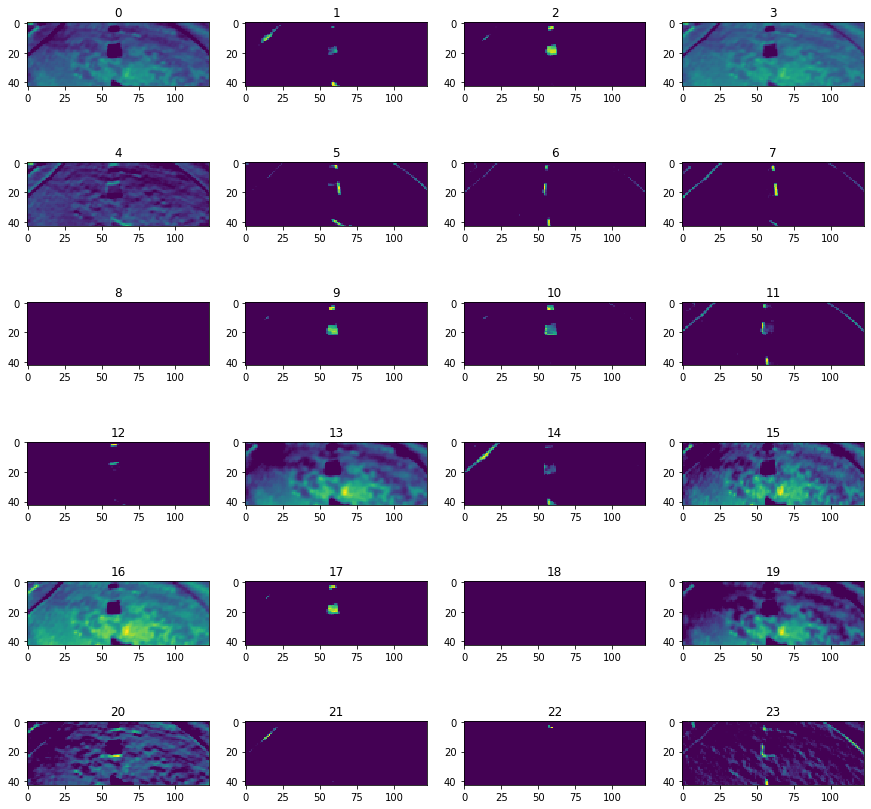

In [18]:
#On trace les activation des différent Kernelcouloir
fig1 , ax1 = plt.subplots(ncols = 4 , nrows = 6 , figsize = (15 , 15))
for i in range (24):
    ax1[i//4][i%4].imshow(activation3['activation_16/Relu:0'][0 , : , : , i])
    ax1[i//4][i%4].title.set_text(i)

plt.show()

## Visualisation des filtres


In [19]:
class VisualizeImageMaximizeFmap(object):
    def __init__(self,pic_shape):
        '''
        pic_shape : a dimention of a single picture e.g., (250,90,3)
        '''
        self.pic_shape = pic_shape
        
    def find_n_feature_map(self,layer_name,max_nfmap):
        '''
        shows the number of feature maps for this layer
        only works if the layer is CNN
        '''
        n_fmap = None
        for layer in model.layers:
            if layer.name == layer_name:
                weights = layer.get_weights()
                n_fmap=weights[1].shape[0]
        if n_fmap is None:
            print(layer_name + " is not one of the layer names..")
            n_fmap = 1
        n_fmap = np.min([max_nfmap,n_fmap])
        return(int(n_fmap))

    def find_image_maximizing_activation(self,iterate,input_img_data,
                                         picorig=False,
                                         n_iter = 300):
        '''
        The input image is scaled to range between 0 and 1
        picorig  : True  if the picture image for input is original scale
                         ranging between 0 and 225
                   False if the picture image for input is ranging [0,1]
        '''
            
        input_img_data = np.random.random((1, 
                                           self.pic_shape[0],
                                           self.pic_shape[1],
                                           self.pic_shape[2]))
        if picorig:
            ## if the original picture is unscaled and ranging between (0,225),
            ## then the image values are centered around 123 with STD=25
            input_img_data = input_img_data*25 + 123 
        ## I played with this step value but the final image looks to be robust
        step = 50

        
        
        # gradient ascent
        loss_values = []
        for i in tqdm(range(n_iter)):
            loss_value, grads_value = iterate([input_img_data, 0])
            input_img_data += grads_value * step
            loss_values.append(loss_value) 
        return(input_img_data,loss_values)

    def create_iterate(self,input_img, layer_output,filter_index):
        '''
        layer_output[:,:,:,0] is (Nsample, 94, 94) tensor contains:
        W0^T [f(image)]_{i,j}], i = 1,..., 94, j = 1,..., 94
        
        layer_output[:,:,:,1] contains:
        W1^T [f(image)]_{i,j}], i = 1,..., 94, j = 1,..., 94
        
        W0 and W1 are different kernel!
        '''
        ## loss is a scalar 
        if len(layer_output.shape) == 4:
            ## conv layer 
            loss = K.mean(layer_output[:,  :, :, filter_index])
        elif len(layer_output.shape) ==2:
            ## fully connected layer
            loss = K.mean(layer_output[:, filter_index])
         
        # calculate the gradient of the loss evaluated at the provided image
        grads = K.gradients(loss, input_img)[0]
        # normalize the gradients
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # iterate is a function taking (input_img, scalar) and output [loss_value, gradient_value]
        iterate = K.function([input_img, K.learning_phase()], [loss, grads])
        return(iterate)

    def deprocess_image(self,x):
        # standardize to have a mean 0 and std  0.1 
        x -= x.mean()
        x /= (x.std() + 1e-5)
        x *= 0.1

        # Shift x to have a mean 0.5 and std 0.1
        # This means 95% of the x should be in between 0 and 1
        # if x is normal
        x += 0.5
        x = np.clip(x, 0, 1)

        # resclar the values to range between 0 and 255
        x *= 255
        x = np.clip(x, 0, 255).astype('uint8')

        return x

    def find_images(self,input_img,layer_names,layer_dict, max_nfmap,
                    picorig=False,n_iter=500):
        '''
        Input :

        input_img   : the alias of the input layer from the deep learning model
        layer_names : list containing the name of the layers whose feature maps to be used
        layer_dict  : symbolic outputs of each "key" layer (we gave them unique names).
        max_nfmap   : the maximum number of feature map to be used for each layer.

        Output : 
        dictionary 

        key = layer name 
        value = a list containing the tuple of (images, list of loss_values) that maximize each feature map
        '''
        argimage = {}
        ## Look for the image for each feature map of each layer one by one
        for layer_name in layer_names: ## the layer to visualize
            print('The layer is', layer_name)
            n_fmap = self.find_n_feature_map(layer_name,max_nfmap)
            layer_output = layer_dict[layer_name].output
            result = self.find_images_for_layer(input_img,
                                                layer_output,
                                                range(n_fmap),
                                                picorig=picorig,
                                                n_iter=n_iter)

            argimage[layer_name] = result
        return(argimage)

    def find_images_for_layer(self,input_img,layer_output,indecies,
                              picorig=False,n_iter=30):
        '''
        indecies : list containing index of 
                      --> filtermaps of CNN or 
                      --> nodes of fully-connected layer
        Output

        a list containing the tuple of (images, list of loss_values) 
        that maximize each feature map


        '''
        result_temp = []
        for filter_index in indecies: # filtermap to visualize
            iterate = self.create_iterate(input_img, layer_output,filter_index)
            print('The Kernel is', filter_index)
            input_img_data, loss_values = self.find_image_maximizing_activation(
                iterate,input_img,
                picorig=picorig,
                n_iter=n_iter)
            result_temp.append((input_img_data,loss_values))
        return(result_temp)

    def plot_images_wrapper(self,argimage,n_row = 8, scale = 1):
        '''
        scale : scale up or down the plot size
        '''
        pic_shape = self.pic_shape
        if pic_shape[2] == 1:
            pic_shape = self.pic_shape[:2]
        try:
            layer_names = np.sort(argimage.keys())
        except:
            layer_names = argimage.keys()

        for layer_name in layer_names:
            n_fmap = len(argimage[layer_name])
            n_col = np.ceil(n_fmap/float(n_row))
            fig = plt.figure(figsize=(n_col*scale,
                                      n_row*scale))
            fig.subplots_adjust(hspace=0.001,wspace=0.001)
            plt.title(layer_name + " n_featuremap=" + str(n_fmap))
            count = 1
            for value in argimage[layer_name]:
                input_img_data = value[0][0]
                img = self.deprocess_image(input_img_data)
                ax = fig.add_subplot(n_row,n_col,count,
                                    xticks=[],yticks=[])
                ax.imshow(img.reshape(*pic_shape))
                count += 1
            plt.show()

In [25]:
model.summary()
input_img = model.layers[0].input
layer_names = ["conv2d_19"]
layer_dict = dict([(layer.name, layer) for layer in model.layers])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             (None, 90, 250, 3)   0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 43, 123, 24)  1824        img_in[0][0]                     
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 43, 123, 24)  96          conv2d_16[0][0]                  
__________________________________________________________________________________________________
activation_16 (Activation)      (None, 43, 123, 24)  0           batch_normalization_16[0][0]     
__________________________________________________________________________________________________
conv2d_17 

  0%|          | 0/500 [00:00<?, ?it/s]

find images that maximize feature maps
The layer is conv2d_19
The Kernel is 0


  0%|          | 0/500 [00:00<?, ?it/s]

The Kernel is 1


  0%|          | 0/500 [00:00<?, ?it/s]

The Kernel is 2


  0%|          | 0/500 [00:00<?, ?it/s]

The Kernel is 3


  0%|          | 0/500 [00:00<?, ?it/s]

The Kernel is 4


100%|██████████| 500/500 [00:02<00:00, 221.69it/s]


plot them...


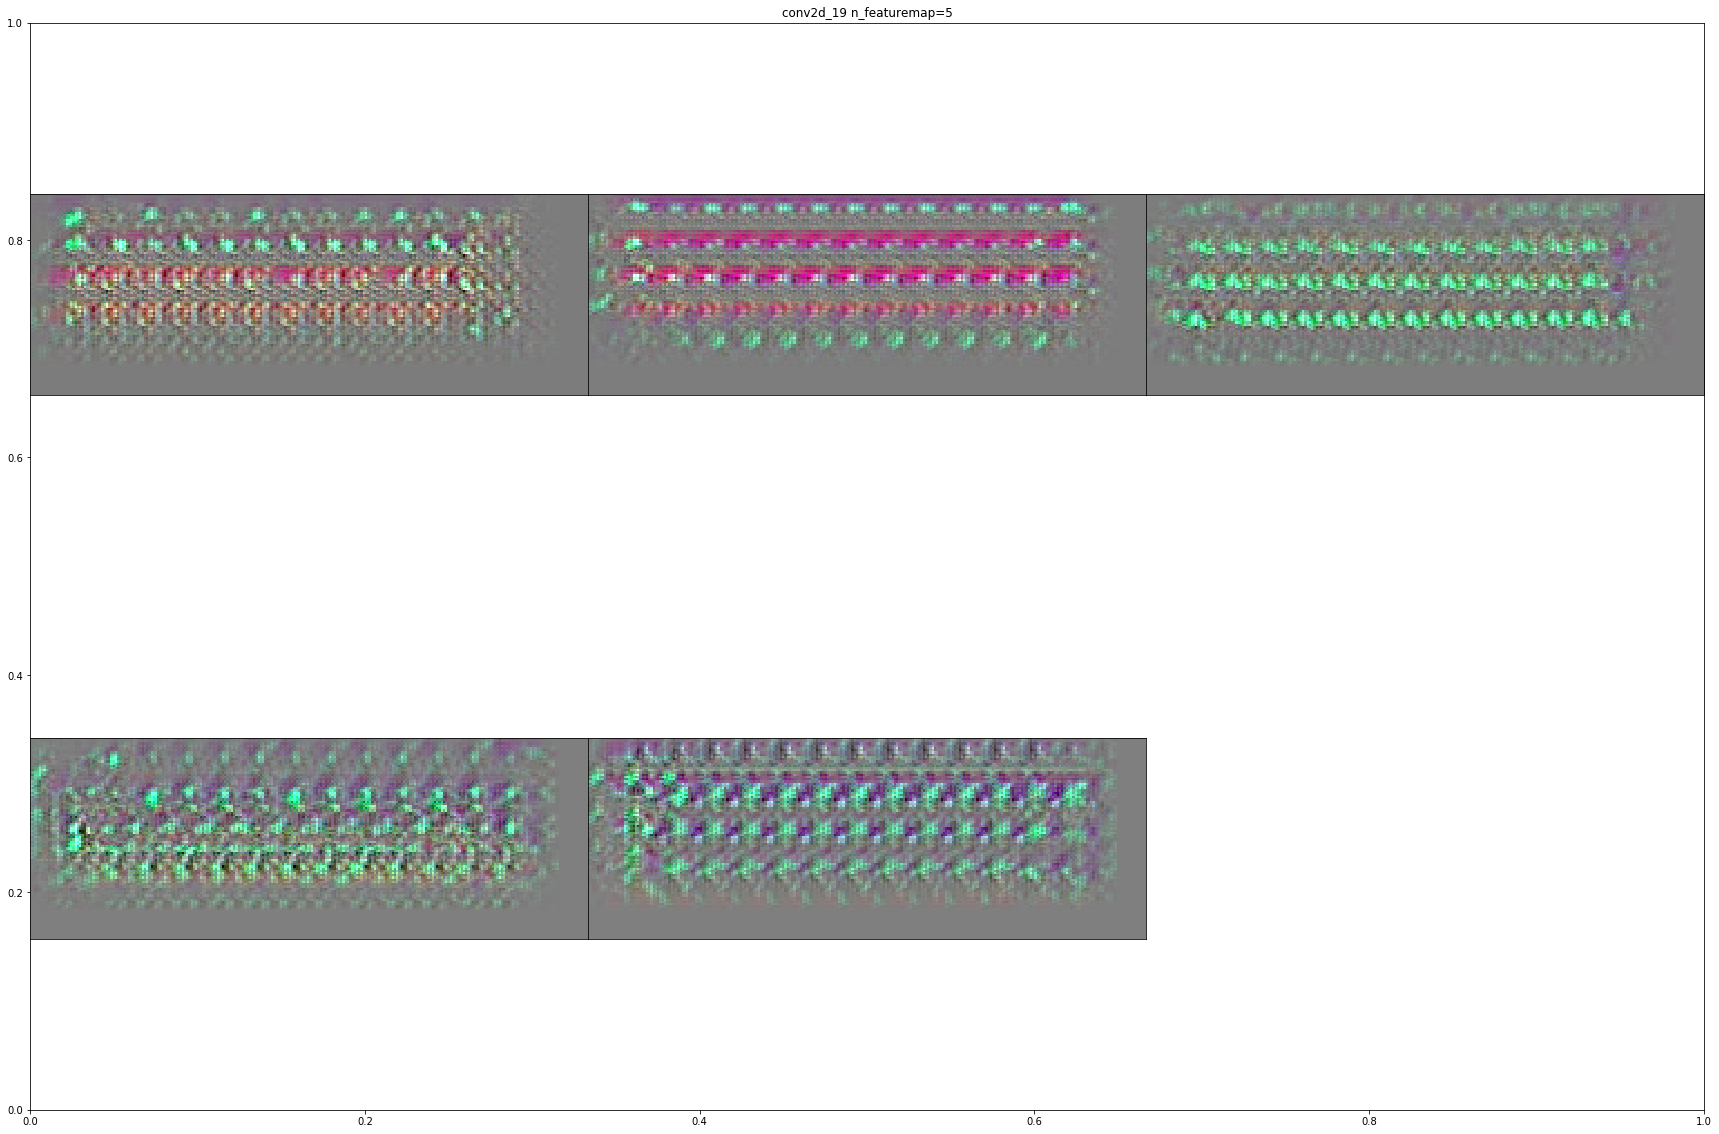

In [26]:
max_nfmap =5

visualizer = VisualizeImageMaximizeFmap(pic_shape = (90,250,3))

print("find images that maximize feature maps")
argimage = visualizer.find_images(input_img,
                                  layer_names,
                                  layer_dict, 
                                  max_nfmap , n_iter = 500)
print("plot them...")
visualizer.plot_images_wrapper(argimage,n_row = 2, scale = 10)